# Семинар по метрикам качества бинарной классификации

## Теоретическая часть

__Вспомнить из лекции:__
* Как вычисляются следующие метрики качества: точность, полнота, F-мера, AUC-ROC, AUC-RPC?

Большинство алгоритмов классификации работают следующим образом: они предсказывают для объекта $x$ вещественное число $b(x)$, а затем сравнивают его с порогом: если $b(x) < T$, то предсказывается класс -1, иначе предсказывается класс +1. Это можно записать в терминах функции sign (знак):
$$a(x) = sign(b(x)-T)$$

Соответственно, метрики качества бинарной классификации можно разделить на две группы: те, которые оценивают бинарные предсказания $a(x)$ (класс -1 и +1), и те, которые оценивают вещественные предсказания $b(x)$. Некоторые метрики последней группы варьируют порог, и оценивают качество бинарных предсказаний при различных порогах. Это полезно, чтобы "отделить" качество работы алгоритма от качества выбора конкретного порога.

#### Вопрос: какие из рассмотренных на лекции метрик относятся к каждой группе?

__Решение:__
Оценивают бинарные предсказания: точность, полнота, F-мера

Оценивают вещественные предсказания: LogLoss, AUC-ROC, AUC-RPC

#### Задача 1
Вычислите accuracy, точность, полноту и  F-меру для следующих векторов предсказаний и правильных ответов:

|                               |    |    |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |

__Решение.__

Accuracy - доля правильных ответов, то есть пар +1,+1 и -1,-1: 4/7

Для вычисления precision, recall, F-меры построим матрицу ошибок:

|                 | Правильный ответ +1 | Правильный ответ -1 |
|-----------------|---------------------|---------------------|
| Предсказание +1 | TP=2                   | FP=1                   |
| Предсказание -1 | FN=2                   | TN=2                   |

Точность (precision) - выделяем все объекты, на которых алгоритм предсказал класс +1 (TP+FP), и смотрим, какова доля объектов действительно класса +1 (TP). Ответ: TP / (TP+FP) = 2/3

Полнота (recall) - выделяем все объекты класса +1 (TP+FN) и смотрим, какую долю алгоритм "нашел" (TP). Ответ: TP / (TP+FN) = 2/4 = 0.5

F-мера - среднее гармоническое точности и полноты:
$$ F = \frac 1 {\frac 1 {P} + \frac 1 R} $$

Вычисляем по формуле: 2 / (1/(2/3) + 1/0.5) = 4/7. F-мера будет большой, только если обе величины (и точность, и полнота) достаточно велики. В нашем примере низкая полнота, поэтому F-мера достаточно маленькая.


#### Задача 2

Постройте ROC-кривую для следующих векторов предсказаний и правильных ответов:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| Предсказание $b(x)$       | 1  | 15 | -1 | 7  | 3  | -8 | -5 |

__Решение.__

ROC-кривая строится в осях FPR (абсцисса) и TPR (ордината), каждая из которых принимает значения от 0 до 1. TPR равна TP поделить на число объектов класса +1 в выборке. FPR равна FP поделить на число объектов класса -1 в выборке. 

Как уже было сказано выше, ROC-кривая оценивает качество вещественных предсказаний и пробует различные варианты порогов. Чтобы построить ROC-кривую, мы сначала сортируем объекты по возрастанию вещественных предсказаний $b(x)$, получим -8, -5, -1, 1, 3, 7, 15. Далее составляем вектор соответствующих этим предсказаниям правильных ответов, получим -1, -1, +1, -1, +1, -1, +1. В идеальной ситуации мы бы хотели, чтобы в этом векторе сначала шли все -1, а затем все +1. Это означало бы, что существует порог $T$, с которым у нас получится не ошибающийся итоговый алгоритм $a(x)$. Но на практике такого обычно не происходит, и метки классов оказываются перемешаны. По сути ROC-кривая показывает, насколько сильно они перемешаны.

Далее мы представляем, что мы постепенно увеличиваем порог $T$, начиная с самого маленького. Поскольку всем объектам с величиной $b(x) < T$ предсказывается класс -1, а с величиной $b(x) > T$ - класс +1, то наш порог на каждом шаге будет "перескакивать" один объект, меняя на нем предсказание. В конце процесса у нас будет самое большое значение порога.

Итак, рассмотрим сначала $T=-10$ (меньше любого $b(x)$). В этом случае мы на всех объекта предсказываем +1, TP равно числу объектов класса +1 в выборке, и TPR равно 1. Аналогично FP равно числу объектов класса -1 в выборке, и FPR равно 1. Значит, мы оказались в точке (1, 1) на графике ROC-кривой.

Аналогично для самого большого порога $T=20$ (больше любого $b(x)$) предсказания на всех объектах равны -1, TP=FP=0, а значит, TPR=FPR=0, и мы оказываемся в точке (0, 0) на графике ROC-кривой.

Когда мы увеличиваем порог от -10 до 20, мы строим кривую от точки (1, 1) к точке (0, 0). Чтобы нарисовать этот путь, надо сначала нарисовать сетку: поделить ось абсцисс на число объектов класса -1, а ось ординат - на число объектов класса +1. Затем надо по одному "перескакивать" через объекты, и если этот объект класса -1 - идти на один шаг влево, если класса +1 - на один шаг вниз. В идеальном случае мы прошли бы через точку (0, 1) - сначала много шагов влево, потом много шагов вниз. 

В нашем примере: вспоминаем соответствующую отсоритрованному вектору $b(x)$ последовательность меток -1, -1, +1, -1, +1, -1, +1. Делим ось абсцисс на 4 части (число -1), ось ординат - на 3 части (число +1). На графике ROC начинаем из (1, 1), идем влево-влево-вниз-влево-вниз-влево-вниз (в соответствии с последовательностью меток). В итоге придем в (0, 0). После построения ROC-кривой можно посчитать площадь под ней - у нас получится 9 прямоугольников площадью 1/3 * 1/4 каждый, то есть 9/12=0.75.

<div>
<img src="https://github.com/nadiinchi/iad2020/raw/master/materials/roc.png" width="200"/>
</div>

__Обратите внимание:__ при построении ROC-кривой мы не используем значения вещественных предсказаний; вещественные предсказания используются только для того, чтобы отсортировать объекты. Поэтому совершенно необязательно, чтобы этими вещественными предсказаниями были вероятности класса +1. Это могут быть любые абстрактные величины, показывающие "склонность" объекта к классу +1.

Если в предсказаниях $b(x)$ встречаются одинаковые значения с разными метками, получится шаг по диагонали.

#### Задача 3

Какое значение AUC-ROC будет у алгоритма $b(x)$, который на каждом объекте возвращает случайное вещественное число из отрезка [-2, 2] (равномерное распределение)? А у алгоритма, который для всех объектов класса -1 возвращает отрицательное число, а для всех объектов класса +1 - положительное число?

__Решение.__

Для первого алгоритма после сортировки объектов по возрастанию $b(x)$ получится случайный порядок меток -1 и +1. Значит, при построении ROC-кривой мы каждый раз будем случайно идти влево или вниз, и общая траектория движения будет около диагонали (0, 0) - (1, 1). Значит, значение AUC-ROC получится примерно 0.5.

Для второго алгоритма после сортировки объектов по возрастанию $b(x)$ получится, что сначала идут -1, а потом +1. Значит, при построении ROC-кривой мы будем сначала идти влево до угла (0, 1), а зтем вниз до угла (0, 0). Значит, значение AUC-ROC будет равно единице.

Мы рассмотрели два "крайних" случая: самый плохой и самый хороший алгоритм. Обычно значение AUC-ROC будет между 0.5 и 1.

#### Задача 4

Пусть для алгоритма $b(x)$ значение AUC-ROC равно 0.2. Каким будет AUC-ROC алгоритма $-b(x)$?

__Решение.__

Для алгоритма $-b(x)$ сортировка объектов будет в обратную сторону, чем для алгоритма $b(x)$, и порядок шагов тоже будет в обратную сторону. Это означает, что кривая "перевернется" на 180 градусов, и AUC-ROC будет равен 1-0.2 = 0.8. 

Рассмотренные примеры показывают, что наихудшее значение AUC-ROC 0.5, а не 0 (так как из 0 всегда легко сделать 1).

По схожим принципам (постепенное увеличение порога) можно построить кривую в осях полнота (абсцисса) - точность (ордината). Эти оси кажутся более привычными, поскольку на практике обычно используют именно эти две метрики. Однако кривая в этих осях получается менее наглядная. В частности, крайние точки такой кривой не (0, 0) и (1, 1), как у ROC-кривой, а (1, доля объектов класса +1) и (0, 1), причем последняя тока доопределена (см. задачу 2). И сама кривая в этом случае не будет монотонной.


## Практическая часть

В sklearn для вычисления метрик есть специальные функции:

In [18]:
from sklearn.metrics import accuracy_score, \
      precision_score, recall_score, f1_score, \
      roc_auc_score, roc_curve, precision_recall_curve

Сгенерируем два бинарных вектора длины 100 (число объектов):

In [2]:
import numpy as np

In [3]:
n = 100
y_true = np.random.randint(2, size=n)
y_pred = np.random.randint(2, size=n)

Вычислим метрики качества бинарных предсказаний для случайных ответов (соответствует алгоритму, не выделяющему никаких закономерностей в данных):

In [4]:
precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

(0.5384615384615384, 0.56, 0.5490196078431373)

In [5]:
accuracy_score(y_true, y_pred)

0.54

Все метрики около 0.5 (примерная доля объектов положительного класса в выборке).

Вычислим метрики для случая, когда все ответы правильные:

In [6]:
precision_score(y_true, y_true), recall_score(y_true, y_true), f1_score(y_true, y_true)

(1.0, 1.0, 1.0)

In [7]:
accuracy_score(y_true, y_true)

1.0

Как и ожидается, все метрики равны 1.

Сгенерируем вектор случайных вещественных предсказаний:

In [8]:
b_pred = np.random.rand(n)

Вычислим roc_auc:

In [9]:
roc_auc_score(y_true, b_pred)

0.5628

Как и ожидается, значение ROC-AUC около 0.5.

Построим ROC-кривую для случайных предсказаний:

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0,0.5,'TPR')

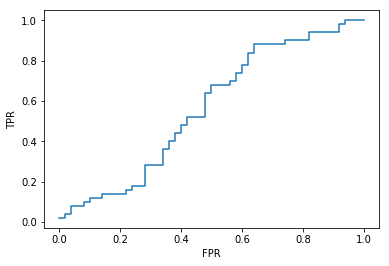

In [16]:
fpr, tpr, thresholds = roc_curve(y_true, b_pred)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

Кривая проходит рядом с диагональю (0, 0) - (1, 1).

Построим кривую полнота-точность:

Text(0,0.5,'precision')

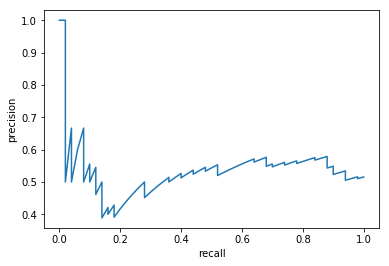

In [23]:
precision, recall, thresholds = precision_recall_curve(y_true, b_pred)
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

Эту кривую не так просто интерпретировать, как ROC-кривую.

# Задачи для самостоятельной работы

Решения задач и вопросос необходимо сдать на листочке в виде фотографии в Anytask до 23:59 сегодняшнего дня.

#### Вопросы:
* В чем преимущество использования средней абсолютной ошибки при обучении линейной регрессии по сравнению со средней квадратичной ошибкой?
* Функции потерь в линейной классификации обычно задаются в виде функции от отступа. Запишите формулу для этого отступа и расшифруйте обозначения. Какие значения этого отступа нужно штрафовать?
* Как в логистической регрессии предсказываются вероятности класса +1?

#### Задача 1.
Загуглите “пронумерованный русский алфавит“. Напишите свою фамилию в именительном падеже по-русски. Замените каждую букву на ее номер в алфавите (нумерация с 1). К каждой букве прибавьте ее номер в фамилии, поделенный на 100. Например:

Чиркова

25+0.01, 10+0.02, 18+0.03, 12+0.04, 16+0.05, 3+0.06, 1+0.07 = 25.01, 10.02, 18.03, 12.04, 16.05, 3.06, 1.07

Запишите вектор из чередующихся +1 и -1 той же длины, что и фамилия, начиная с +1.

В примере:

+1 -1 +1 -1 +1 -1 +1

Первый вектор - это вектор предсказаний алгоритма, второй вектор - это вектор меток классов. Постройте ROC-кривую по этим данным и вычислите AUC-ROC.
Запишите все шаги решения задачи. Процесс записи условия можно не описывать :)

#### Задача 2.

Бинаризуйте предсказания из предыдущей задачи по порогу 10: если предсказание больше 10, предсказывается класс +1, иначе предсказывается класс -1. Найдите точность, полноту и F-меру. Запишите все шаги решения задачи.